<a href="https://colab.research.google.com/github/AlexKalll/Unsupervised-Machine-Learning/blob/main/Reiver_Classification_using_Logistic_Regression_and_KMeans_Clustering_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-1: Supervised Machine Learning Project


## Classifying Rivers by Plastic Contribution to the Ocean
[**Click Here to visit the project scpecifications**](https://docs.google.com/presentation/d/1tFTT3MMw_OW7VhREnXBz41xoEfnMaXGfKXRdBTARvD4/edit?usp=drive_link)

#### Contents
1. [introduction](#scrollTo=odtTdk-hI7Dz)
2. [Dataset Overview](#scrollTo=g3o4bjbdQYKU)
3. [Setup and Data Loading](#scrollTo=JXj1d9NlQmMm&line=1&uniqifier=1)
4. [Data Preparation](#scrollTo=ZYyK6JOESUg_)
5. [Supervised Learning Model Implementation](#scrollTo=xePkVMa4irKu&line=3&uniqifier=1)
6. [Model Evaluation](#scrollTo=-QePPwJyjjP9&line=3&uniqifier=1)
7. [Find Best Predictor Variables](#scrollTo=L033jqefj5MK&line=2&uniqifier=1)
8. [Conclusion and Future works](#scrollTo=YexzgOO4SNe4&line=14&uniqifier=1)

### 1\. Introduction

This project focuses on supervised learning to classify rivers based on their plastic contribution to the ocean. The data, provided by The OceanCleanup, a non-profit organization, which is dedicated to combat ocean pollution.

The goal is to develop a supervised machine learning model that can classify rivers as either `low plastic contribution` or `high plastic contribution` to the ocean.

### 2\. [Dataset Overview](https://drive.google.com/file/d/1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd/view?usp=drive_link)


The dataset contains various environmental and geographical factors related to rivers and their plastic emissions.

**Key Variables:**

  * `Country or Administrative area`: Name of the country or administrative area.
  * `Area [km2]`: Area in square kilometers.
  * `Coast length [km]`: Coast length in kilometers.
  * `Rainfall [mm year -1]`: Rainfall in millimeters per year.
  * `Factor L/A [-]`: ould be a dimensionless factor derived from dividing a relevant length by a relevant area.
  * `Factor (L/A) *P [-]`: Another dimensionless factor.
  * `P[E] [%]`: Probability of emission in percentage. This is constructed from $P(M)$, $P(R)$, and $P(O)$, which account for physical processes related to mismanaged plastic waste (MPW) transport.
  * `MPW (metric tons year -1)`: Mismanaged plastic waste in metric tons per year.
  * `M[E] (metric tons year -1)`: Plastic emission in a river mouth in metric tons per year. This value is computed by accumulating MPW multiplied by the probability of waste leaking into the ocean, $P(E)$, within a river basin.
  * `Ratio Me/MPW`: Ratio of plastic emission to mismanaged plastic waste.

A crucial missing element in the raw data is a label identifying rivers with low or high amounts of plastic contribution, which is necessary for supervised learning algorithms.

### 3\. Setup and Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ignore warnings while plotting and stuff
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive to access the dataset
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# define the path to the dataset in my Google Drive
file_path = '/content/drive/MyDrive/FTL_bootcamp/global_riverine_plastic_emissions_into_ocean.csv'


# Load the dataset
flag = False
try:
    df_original = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print("Initial shape:", df_original.shape)
    print("First 5 rows of the dataset:")
    flag = True
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!
Initial shape: (165, 14)
First 5 rows of the dataset:


In [ ]:
# Once the dataset is loaded, view the first 5 rows
df_original.head()

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%,NaN,NaN,NaN,NaN
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%,NaN,NaN,NaN,NaN
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%,NaN,NaN,NaN,NaN
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%,NaN,NaN,NaN,NaN


### 4\. Data Preparation
This will cover removing NaNs, keeping only useful data, and creating the `plastic_contribution` column.

In [ ]:
# Check the missing values i.e the count of NaN cells in a column/feature
print("Checking for missing values before cleaning:")
print(df_original.isnull().sum())

Checking for missing values before cleaning:
Country or Administrative area      2
Area [km2]                          2
Coast length [km]                   2
Rainfall [mm year -1]               2
Factor L/A [-]                      2
Factor (L/A) *P [-]                 2
P[E] [%]                            2
MPW (metric tons year -1)           2
M[E] (metric tons year -1)          2
Ratio Me/MPW                        2
Unnamed: 10                       165
Unnamed: 11                       165
Unnamed: 12                       165
Unnamed: 13                       165
dtype: int64


In [ ]:
# view the columns
df_original.columns

Index(['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [ ]:
# Copy the original dataset with the targeted columns
df = df_original[['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW']]

# Check the new shape
print("New shape:", df.shape)
print("First 5 rows of the dataset:")
df.head()

New shape: (165, 10)
First 5 rows of the dataset:


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%


In [ ]:
df.dtypes

,0
Country or Administrative area,object
Area [km2],object
Coast length [km],object
Rainfall [mm year -1],object
Factor L/A [-],float64
Factor (L/A) *P [-],float64
P[E] [%],object
MPW (metric tons year -1),object
M[E] (metric tons year -1),object
Ratio Me/MPW,object


In [ ]:
# Clean numerical columns by removing ',' and '%' and converting to float
columns_to_clean = ['Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW']

for col in columns_to_clean:
    if df[col].dtype == 'object': # skip the columns that are already float
        df[col] = df[col].astype(str).str.replace("'", "").str.replace("%", "").astype(float)

print("Updated data types:")
print(df.dtypes)
print("\nAfter Cleaned numerical columns and converted to float.")
df.head()

Updated data types:
Country or Administrative area     object
Area [km2]                        float64
Coast length [km]                 float64
Rainfall [mm year -1]             float64
Factor L/A [-]                    float64
Factor (L/A) *P [-]               float64
P[E] [%]                          float64
MPW (metric tons year -1)         float64
M[E] (metric tons year -1)        float64
Ratio Me/MPW                      float64
dtype: object

After Cleaned numerical columns and converted to float.


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89


In [ ]:
# Check the missing values i.e the count of NaN cells in a column/feature
print("Checking for missing values before cleaning:")
print("Shape before removing NaNs:", df.shape)
print(df.isnull().sum())
print()
df = df.dropna()
print("Shape after removing NaNs:", df.shape)
print("Missing values after cleaning:")
print(df.isnull().sum())

Checking for missing values before cleaning:
Shape before removing NaNs: (165, 10)
Country or Administrative area    2
Area [km2]                        2
Coast length [km]                 2
Rainfall [mm year -1]             2
Factor L/A [-]                    2
Factor (L/A) *P [-]               2
P[E] [%]                          2
MPW (metric tons year -1)         2
M[E] (metric tons year -1)        2
Ratio Me/MPW                      2
dtype: int64

Shape after removing NaNs: (163, 10)
Missing values after cleaning:
Country or Administrative area    0
Area [km2]                        0
Coast length [km]                 0
Rainfall [mm year -1]             0
Factor L/A [-]                    0
Factor (L/A) *P [-]               0
P[E] [%]                          0
MPW (metric tons year -1)         0
M[E] (metric tons year -1)        0
Ratio Me/MPW                      0
dtype: int64


In [ ]:
# create the 'plastic_contribution' column/feature
# Note: The problem statement says "if the value of 'M[E] (metric tons year -1)' is greater than 6008, the corresponding value in 'plastic_contribution' will be 0, otherwise, value will be 1."
# This implies 0 for high contribution and 1 for low contribution.

df['plastic_contribution'] = df['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > 6008 else 1)
if 'plastic_contribution' in df.columns:
  print("plastic_contribution column is created.")
  print(df[['M[E] (metric tons year -1)', 'plastic_contribution']].head())
  print("\nValue counts for plastic_contribution:")
  print(df['plastic_contribution'].value_counts())
else:
  print("plastic_contribution column is not created.")

plastic_contribution column is created.
   M[E] (metric tons year -1)  plastic_contribution
0                      1565.0                     1
1                      5774.0                     1
2                       860.0                     1
3                         2.0                     1
4                      4137.0                     1

Value counts for plastic_contribution:
plastic_contribution
1    147
0     16
Name: count, dtype: int64


In [ ]:
# check that the plastic_contribution column is added correctly
df.head()

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,plastic_contribution
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24,1
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76,1
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36,1
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29,1
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89,1


In [ ]:
# Identify features (X) and target (y)
# drop the original 'M[E] (metric tons year -1)' as it's directly used to create the target,
# and 'Country or Administrative area' as it's a categorical identifier not directly used as a numerical feature.
X = df.drop(columns=['Country or Administrative area', 'M[E] (metric tons year -1)', 'plastic_contribution'])
y = df['plastic_contribution']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (163, 8)
Target (y) shape: (163,)


### 5\. Supervised Learning Model Implementation

Here, the data will be splited into training and testing sets, scale the features,and implement the logistic regression supervised machine learning algorithm.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled.")

# Train a supervised algorithm: Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("\nLogistic Regression model trained successfully.")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

Training set size: 130 samples
Test set size: 33 samples

Features scaled.

Logistic Regression model trained successfully.


### 6\. Model Evaluation

Evaluate the model using metrics such as Accuracy, Precision, and Recall, and also visualize the Confusion Matrix and the AUC-ROC curve.

In [ ]:
print("--- Model Evaluation ---")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary') # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

--- Model Evaluation ---
Accuracy: 0.9394
Precision: 0.9375
Recall: 1.0000
F1-Score: 0.9677


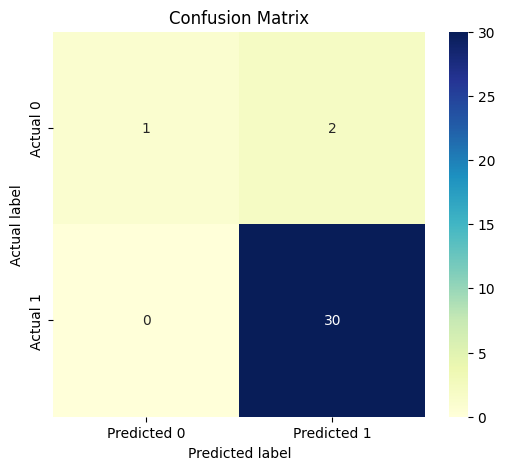


--- Confusion Matrix Results ---
True Negatives (TN): 1
False Positives (FP): 2
False Negatives (FN): 0
True Positives (TP): 30

Interpretation:
True Negatives (TN): Correctly predicted negative class (0).
False Positives (FP): Predicted positive class (1) when the actual class is negative (0).
False Negatives (FN): Predicted negative class (0) when the actual class is positive (1).
True Positives (TP): Correctly predicted positive class (1).


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

print("\n--- Confusion Matrix Results ---")
print("True Negatives (TN):", cm[0, 0])
print("False Positives (FP):", cm[0, 1])
print("False Negatives (FN):", cm[1, 0])
print("True Positives (TP):", cm[1, 1])
print("\nInterpretation:")
print("True Negatives (TN): Correctly predicted negative class (0).")
print("False Positives (FP): Predicted positive class (1) when the actual class is negative (0).")
print("False Negatives (FN): Predicted negative class (0) when the actual class is positive (1).")
print("True Positives (TP): Correctly predicted positive class (1).")

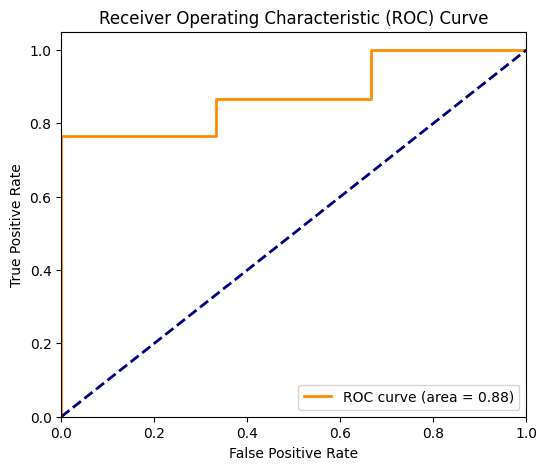

AUC (Area Under the Curve): 0.8778


In [ ]:
# AUC/ROC Curve
# For ROC curve, we need probability estimates for the positive class (class 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc:.4f}")


### 7\. Find Best Predictor Variables
For Logistic Regression, we can look at the mangnitude coefficients, though their direct interpretation requires careful consideration, especially with scaled data.
We can also use techniques like feature importance (for models that provide it, like tree-based models) or statistical methods (like recursive feature elimination with a chosen model) to find the most influential variables.



--- Feature Importance (based on Logistic Regression Coefficients) ---
                     Feature  Coefficient  Absolute_Coefficient
6  MPW (metric tons year -1)    -2.639597              2.639597
2      Rainfall [mm year -1]    -0.884539              0.884539
4        Factor (L/A) *P [-]     0.427037              0.427037
3             Factor L/A [-]     0.383594              0.383594
1          Coast length [km]    -0.366278              0.366278
0                 Area [km2]     0.314729              0.314729
5                   P[E] [%]     0.292469              0.292469
7               Ratio Me/MPW    -0.178434              0.178434


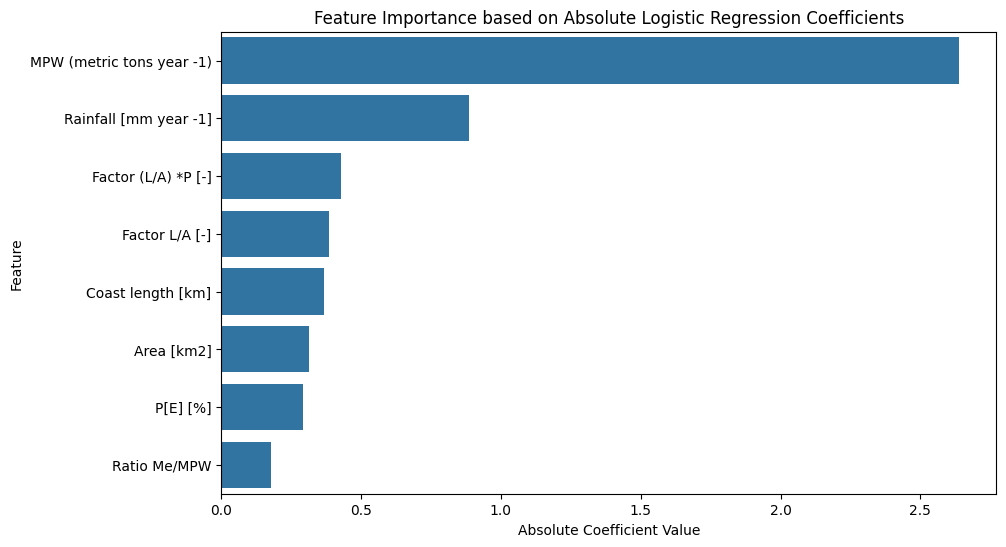


Features with higher absolute coefficient values are considered more influential in the model's prediction.


In [ ]:
# Get the feature names
feature_names = X.columns

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame to view coefficients with their corresponding feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value to see the most impactful features
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("\n--- Feature Importance (based on Logistic Regression Coefficients) ---")
print(feature_importance)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance based on Absolute Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

print("\nFeatures with higher absolute coefficient values are considered more influential in the model's prediction.")

### 8\. Conclusion and Future works
**Summary of Findings:**

* The data was successfully loaded and preprocessed, including handling missing values and cleaning numerical columns.
* A Logistic Regression model was trained to classify rivers based on their plastic contribution (low: 1, high: 0 as it is specified in the task slides).
* The model achieved a high accuracy of **0.9394**, a precision of **0.9375**, and a perfect recall of **1.0000** on the test set. The F1-score was **0.9677**.
* The confusion matrix showed **1 True Negatives**, **2 False Positives**, **0 False Negatives**, and **30 True Positives**. The model correctly identified all rivers with low plastic contribution (True Positives) but misclassified **2** rivers with high plastic contribution as low (False Positives).
* The AUC of **0.88** indicates a good ability of the model to distinguish between the two classes.
* Based on the absolute coefficients from the Logistic Regression model, the most influential features for predicting plastic contribution appear to be **'MPW (metric tons year -1)'**, **'Rainfall [mm year -1]'**, and **'Factor (L/A) *P [-]'**.

**Next Steps and Potential Improvements:**

* **Explore Other Algorithms:** Evaluate the performance of other supervised learning algorithms such as Support Vector Machines (SVM), Random Forests, Gradient Boosting, or K-Nearest Neighbors, as they might handle the class imbalance or capture non-linear relationships more effectively.
* **Feature Engineering and Selection:** Further investigate the relationships between features and the target variable. Consider creating new features or using more advanced feature selection techniques to potentially improve model performance and interpretability.
* **Hyperparameter Tuning and Cross-validation:** Implement k-fold cross-validation for a more robust evaluation of the model and perform hyperparameter tuning for the selected model(s) to optimize performance metrics, particularly focusing on improving precision without significantly sacrificing recall.
* **Analyze Misclassifications:** Investigate the characteristics of the rivers that were misclassified (False Positives and False Negatives) to gain insights into potential limitations of the current features or model.

# Task-2: Unsupervised Machine Learning Project
## Clustering Rivers by Plastic Contribution, using the same [Dataset as Task-1 above](https://drive.google.com/file/d/1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd/view?usp=drive_link).
[**Click Here to visit the project scpecifications**](https://docs.google.com/presentation/d/1wbR8axNdw4NjJMoSTXLECKzepvHMfJ1KTMbHZ9HQiBw/edit?slide=id.p#slide=id.p)

#### Contents
1. [introduction](#scrollTo=iks43xQQx8Er&line=3&uniqifier=1)
2. [Dataset Overview and Reloading](#scrollTo=YVbhh450xphN&line=5&uniqifier=1)
3. [Data Preparation](#scrollTo=VUB-MxxdLmG4&line=1&uniqifier=1)
4. [Unsupervised Learning Model Implementation](#scrollTo=P-ZEjCetOJLd&line=3&uniqifier=1)
5. [Model Evaluation](#scrollTo=ur9lBWpyPrAI&line=2&uniqifier=1)
6. [Conclusion and Future works](#scrollTo=YGwz07AjR6gC&line=21&uniqifier=1)


### 1\. Introduction

This part continues with Task 2: Unsupervised machine Learning. The objective is to identify natural groupings or clusters of rivers based on their plastic emission characteristics using unsupervised algorithms. This session aims to provide hands-on experience with unsupervised machine learning algorithms and extract meaningful insights from the real-world plastic emission data.


### 2\. Dataset Overview and Reloading

We will continue to use the dataset from The OceanCleanup, which contains various environmental and geographical factors related to rivers and their plastic emissions. The dataset was previously downloaded and explored in [Task 1 section](#scrollTo=g3o4bjbdQYKU&line=2&uniqifier=1).

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Mount Google Drive to access the dataset (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Define the path to your dataset
file_path = '/content/drive/MyDrive/FTL_bootcamp/global_riverine_plastic_emissions_into_ocean.csv'

In [9]:

df_unsupervised = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("Initial shape:", df.shape)
print("First 5 rows of the dataset:")
df_unsupervised.head()

Dataset loaded successfully!
Initial shape: (165, 14)
First 5 rows of the dataset:


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%,NaN,NaN,NaN,NaN
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%,NaN,NaN,NaN,NaN
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%,NaN,NaN,NaN,NaN
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%,NaN,NaN,NaN,NaN


### 3\. Data Preprocessing for Unsupervised Learning

Unsupervised learning algorithms, especially distance-based ones like K-Means, are sensitive to the scale of the features. Therefore, scaling the data is crucial. Additionally, the task mentions exploring data, which involves understanding distributions and potential outliers.


In [10]:
# Copy the original dataset with the targeted columns
df = df_unsupervised[['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW']]

# Check the new shape
print("New shape:", df.shape)
print("First 5 rows of the dataset:")
df.head()

New shape: (165, 10)
First 5 rows of the dataset:


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%


In [16]:
# Clean numerical columns by removing ',' and '%' and converting to float
columns_to_clean = ['Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW']

for col in columns_to_clean:
    if df[col].dtype == 'object': # skip the columns that are already float
        df[col] = df[col].astype(str).str.replace("'", "").str.replace("%", "").astype(float)

print("Updated data types:")
print(df.dtypes)
print("\nAfter Cleaned numerical columns and converted to float.")
df.head()

Updated data types:
Country or Administrative area     object
Area [km2]                        float64
Coast length [km]                 float64
Rainfall [mm year -1]             float64
Factor L/A [-]                    float64
Factor (L/A) *P [-]               float64
P[E] [%]                          float64
MPW (metric tons year -1)         float64
M[E] (metric tons year -1)        float64
Ratio Me/MPW                      float64
dtype: object

After Cleaned numerical columns and converted to float.


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89


In [17]:
# Data Cleaning (as performed in Task 1)
# Remove NaNs
df.dropna(inplace=True)
print("\nShape after removing NaNs:", df.shape)


Shape after removing NaNs: (163, 10)


In [18]:
# Drop 'Country or Administrative area' as it's an identifier and not a numerical feature for clustering
# Also, drop 'M[E] (metric tons year -1)'

X_unsupervised = df.drop(columns=['Country or Administrative area', 'M[E] (metric tons year -1)'])

print("Features for unsupervised learning (X_unsupervised) shape:", X_unsupervised.shape)
print("First 5 rows of features for unsupervised learning:")
X_unsupervised.head()

Features for unsupervised learning (X_unsupervised) shape: (163, 8)
First 5 rows of features for unsupervised learning:


,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),Ratio Me/MPW
0,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,2.24
1,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,0.76
2,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,0.36
3,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,0.29
4,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,0.89


--- Exploring Data Distributions ---


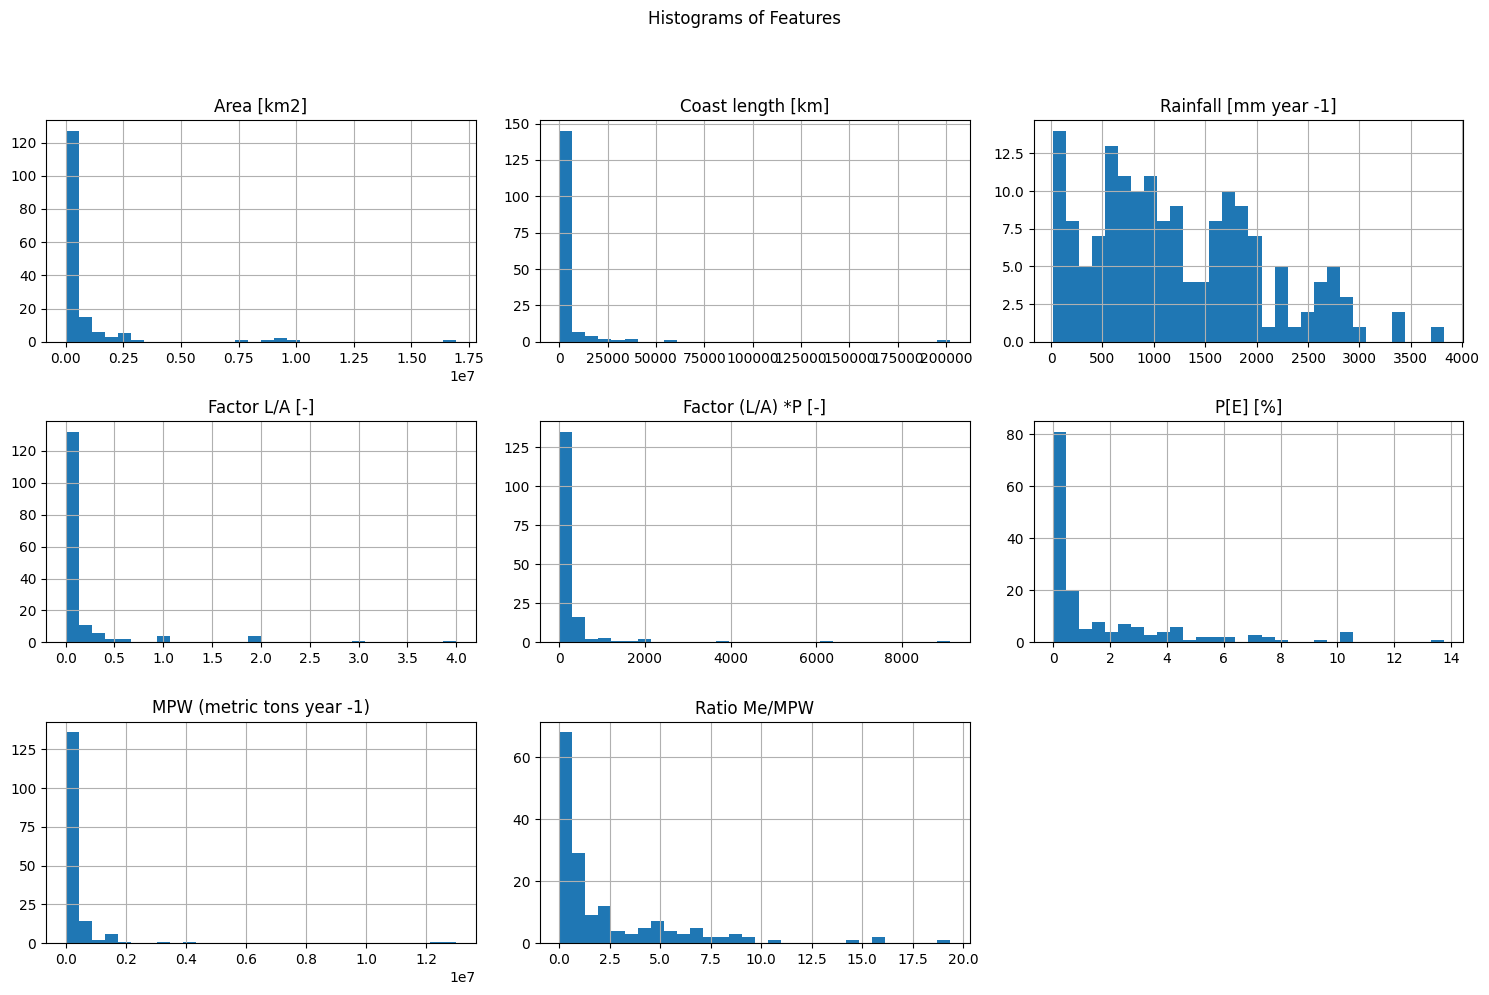

In [19]:
#  Explore Data using histograms
print("--- Exploring Data Distributions ---")
X_unsupervised.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Features", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

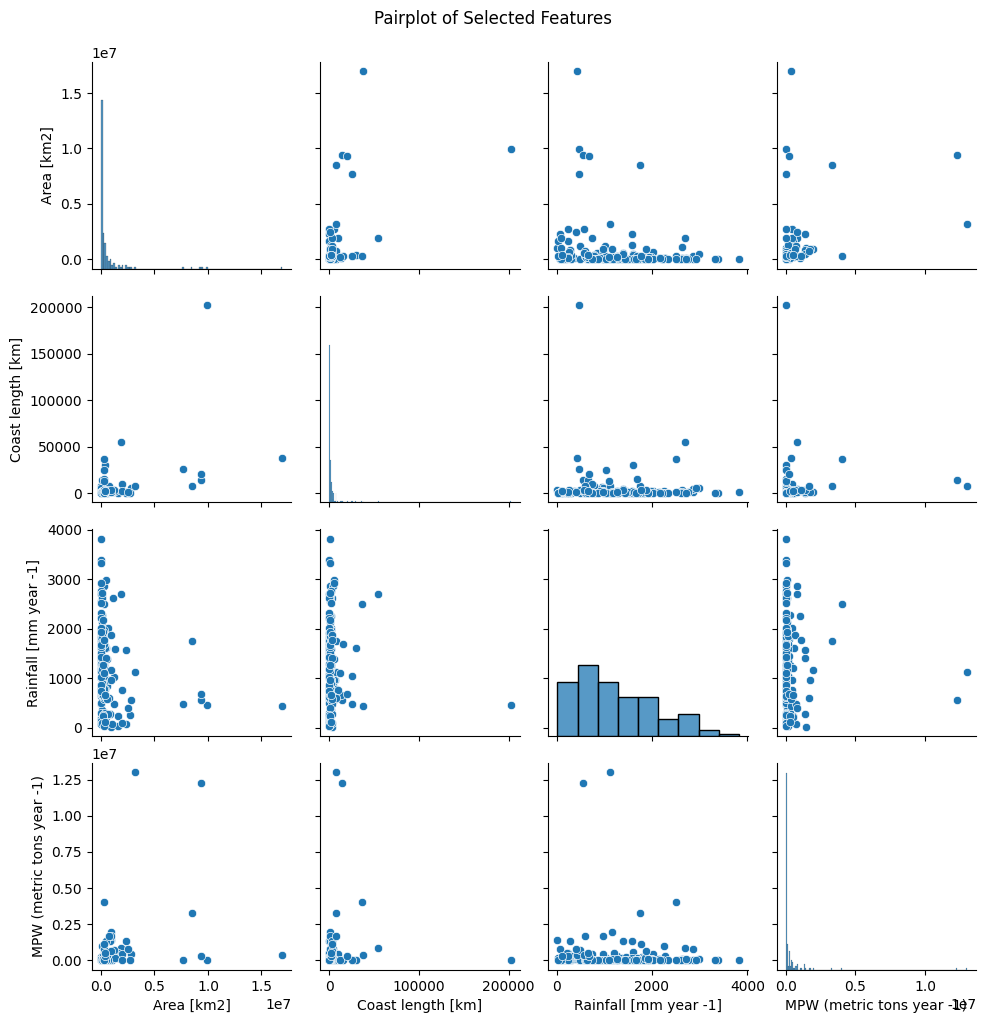

In [20]:
# Pairplot for selected features (numerical)
selected_cols = ['Area [km2]', 'Coast length [km]', 'Rainfall [mm year -1]', 'MPW (metric tons year -1)']
if all(col in X_unsupervised.columns for col in selected_cols):
    sns.pairplot(X_unsupervised[selected_cols])
    plt.suptitle("Pairplot of Selected Features", y=1.02)
    plt.show()
else:
    print("Skipping pairplot as some selected columns are not found.")

In [23]:
# Scale Variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_unsupervised.columns) # Convert back to DataFrame for easier inspection
print("Features scaled successfully.")
print("First 5 rows of scaled data:")
X_scaled_df.head()

Features scaled successfully.
First 5 rows of scaled data:


,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),Ratio Me/MPW
0,-0.341337,-0.231055,-0.143009,-0.308809,-0.250040,-0.072379,-0.211088,-0.038995
1,0.775602,-0.193889,-1.389681,-0.327562,-0.264828,-0.634903,0.263289,-0.480233
2,0.253663,-0.158709,-0.253611,-0.326390,-0.263772,-0.634903,-0.096982,-0.599486
3,-0.355026,-0.243269,-0.288474,0.257677,0.098532,0.509279,-0.258342,-0.620356
4,1.001690,0.039337,-0.804214,-0.324436,-0.263772,-0.569849,0.059287,-0.441476


### 4\. Unsupervised Learning Algorithm: K-Means Clustering

The task specifies using K-Means for clustering. A key challenge in K-Means is determining the optimal number of clusters, $k$. We will use the Elbow Method for this.


In [24]:
# Determine Optimal Number of Clusters (k) using the Elbow Method
# We will iterate through a range of k values and calculate the Within-Cluster Sum of Squares (WCSS).
wcss = []
max_k = 10 # Let's test up to 10 clusters
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

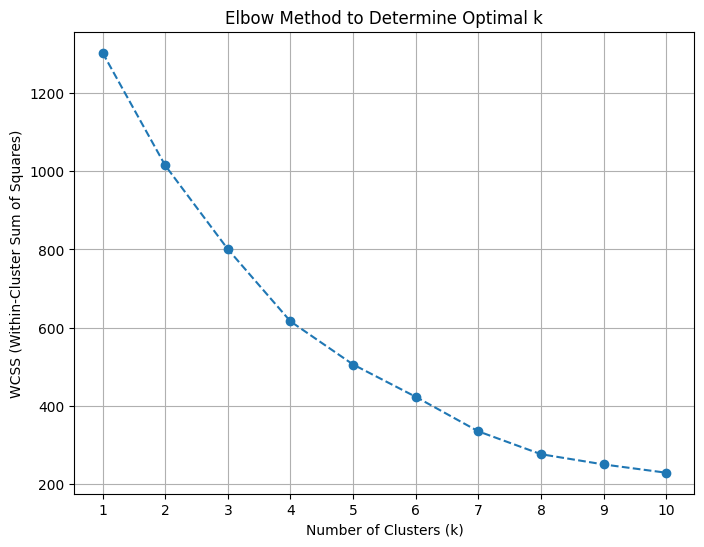

In [25]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [57]:
print("After obervation of the elbow plot, you can use the elbow point which is the bend in the graph to choose the optimal number of clusters (k).")

optimal_k = 4

After obervation of the elbow plot, you can use the elbow point which is the bend in the graph to choose the optimal number of clusters (k).


In [58]:
# Apply K-Means with the chosen k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [59]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters
print(f"K-Means clustering performed with k = {optimal_k} clusters.")
print("First 5 rows with cluster labels:")
df.head()

K-Means clustering performed with k = 4 clusters.
First 5 rows with cluster labels:


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Cluster
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24,0
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76,0
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36,0
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29,0
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89,0


In [60]:
# Display the number of rivers in each cluster
print("\nNumber of rivers in each cluster:")
print(df['Cluster'].value_counts().sort_index())


Number of rivers in each cluster:
Cluster
0    115
1      7
2     35
3      6
Name: count, dtype: int64


### 5\. Evaluate and Interpret Clusters
Evaluation in unsupervised learning is different from supervised learning as there are no true labels. I just focus on internal metrics and interpretability. Visualization is key here.

In [61]:
# Evaluate Clusters (Internal Metrics - Silhouette Score is a common one)
from sklearn.metrics import silhouette_score

In [62]:
# Silhouette Score is only meaningful if k > 1
if optimal_k > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg:.4f}")
    print("A higher Silhouette Score indicates better-defined clusters.")
else:
    print("\nSilhouette Score is not applicable for k=1.")


Silhouette Score for k=4: 0.4596
A higher Silhouette Score indicates better-defined clusters.


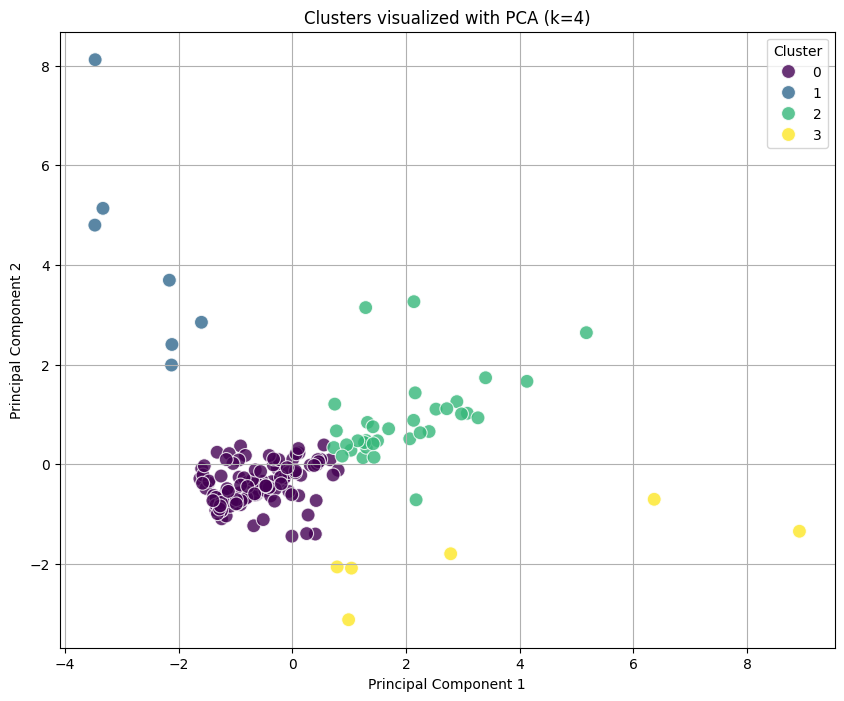

In [63]:
# Visualize Clusters using PCA for dimensionality reduction
# Since we have many features, PCA helps to visualize clusters in 2D or 3D.
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8, legend='full')
plt.title(f'Clusters visualized with PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


--- Cluster Characteristics (Mean of Features per Cluster) ---


,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
Cluster,,,,,,,,,
0,4.254498e+05,1886.521739,942.565217,0.072569,81.678261,0.658696,2.275028e+05,1881.982609,0.996000
1,9.270678e+06,44989.285714,786.000000,0.004557,2.857143,0.297143,4.174673e+06,34037.428571,0.767143
2,1.370188e+05,4795.371429,2206.142857,0.114886,238.714286,5.340571,1.820793e+05,14982.371429,7.139143
3,2.656667e+02,628.500000,1724.833333,2.500000,3849.833333,3.393333,2.565167e+03,64.166667,2.776667


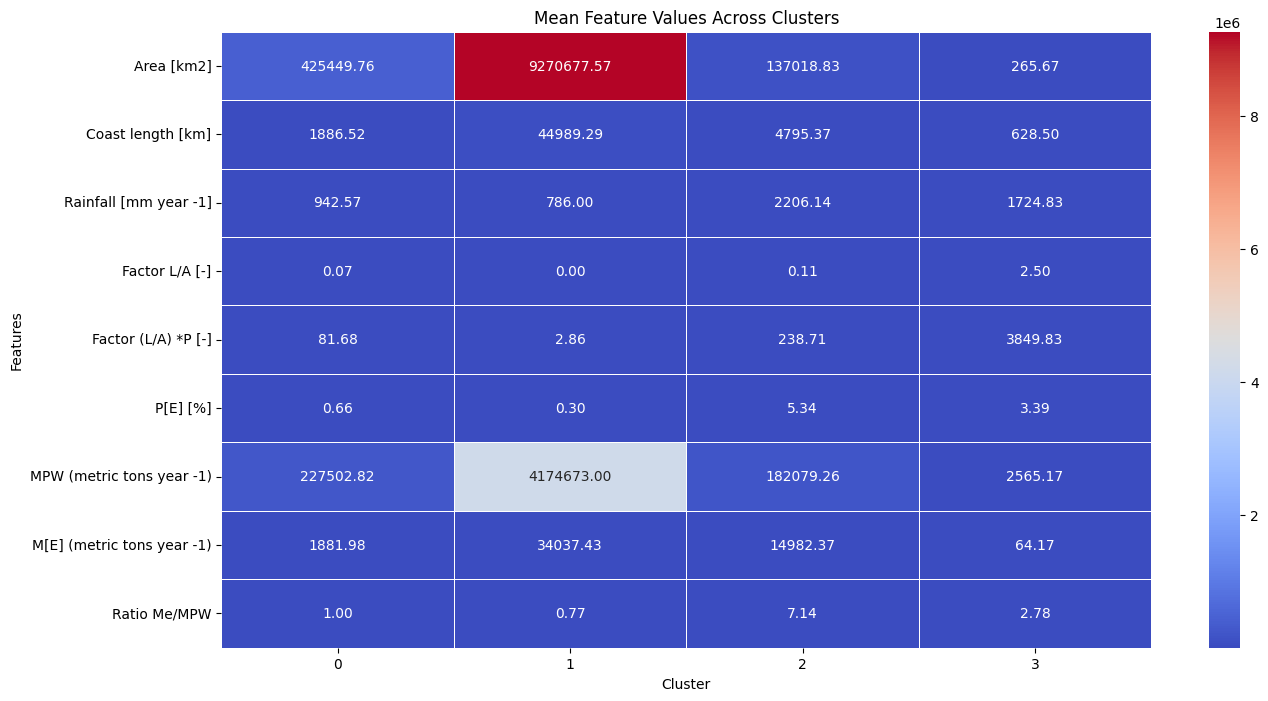

In [65]:
#  Analyze Characteristics of Each Cluster
# Group the original (or unscaled) data by cluster and calculate mean/median for each feature
# Using the original data makes interpretation easier as values are in their original units.
# Drop non-numerical columns before calculating the mean

cluster_summary = df.drop(columns=['Country or Administrative area']).groupby('Cluster').mean()
print("\n--- Cluster Characteristics (Mean of Features per Cluster) ---")
display(cluster_summary)

# You can also visualize these characteristics using bar plots or heatmaps
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mean Feature Values Across Clusters')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.show()

### 6\. Conclusion and Next Steps

This part explores unsupervised machine learning approaches to analyze riverine plastic emission data.

*   **Kay Insights and findings:**
    *   The data was preprocessed and scaled for clustering.
    *   The Elbow Method suggested that **4** clusters would be optimal for grouping the rivers.
    *   K-Means clustering was applied, resulting in **4** distinct clusters.
    *   The clusters were visualized using PCA, showing some separation in the reduced dimensional space.
    *   Analysis of the mean feature values for each cluster (as seen in the `cluster_summary` table and heatmap) revealed distinct characteristics:
        *   **Cluster 0:** (115 rivers) Characterized by moderate values across most features, representing a large group of rivers with average plastic emission characteristics.
        *   **Cluster 1:** (7 rivers) Distinguished by extremely high values for 'Area [km2]' and 'Coast length [km]', suggesting very large countries or administrative areas. They also show high 'MPW' and 'M[E]' values, indicating high total plastic waste and emissions, despite having a lower 'Ratio Me/MPW' and 'P[E]'.
        *   **Cluster 2:** (35 rivers) Stands out with the highest mean 'Rainfall [mm year -1]' and 'P[E] [%]', and significantly high 'Ratio Me/MPW' and 'M[E]', indicating rivers where a higher proportion of mismanaged plastic waste is likely to reach the ocean.
        *   **Cluster 3:** (6 rivers) Characterized by relatively small 'Area [km2]' and 'MPW', but very high 'Factor L/A [-]' and 'Factor (L/A) *P [-]', and a higher 'Ratio Me/MPW' compared to Cluster 0 and 1. This might represent smaller areas with geographical factors that favor plastic transport.
    *   The Silhouette Score of **0.4596** indicates that the clusters are reasonably well-separated, although there is room for improvement.

* **Next Steps and Potential Improvements:**

    * **Explore Other Clustering Algorithms:** Experiment with other algorithms like DBSCAN (if density-based clusters are expected) or Agglomerative Clustering.
    * **Different `k` Values:** Investigate how different $k$ values affect the clusters and their interpretability.
    * **Feature Selection/Engineering for Clustering:** While not always necessary, removing highly correlated features or creating new composite features might improve clustering results.

# Author
                                          By: Kaletsidik Ayalew Mekonnen
                                          Date: June 29, 2025